Import Libraries and data

In [ ]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import matplotlib.pyplot as plt # used for data visualization
import seaborn as sns # used to see patterns and relationships
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


df = pd.read_csv('/content/drive/MyDrive/Netflix Data/netflix_titles.csv') # Import the data

 Checking number of rows and columns in data

In [ ]:
df.shape

 Checking content available in Dataset

In [ ]:
df.head()

Show total no. of values in the dataset

In [ ]:

df.size

105684

Statistical Summary of Object Columns

In [ ]:
df.describe(include=['object'])

In [ ]:
df['show_id'].nunique() # unique val in 'show_id' column

8807

In [ ]:
df.set_index('show_id', inplace=True) # Sets show_id as the index

# Checking For Duplicated Values

In [ ]:
df[df.duplicated()]

In [ ]:
num_duplicated_rows = df.duplicated().sum()
print("Count of Duplicated rows is :",num_duplicated_rows)

Count of Duplicated rows is : 0


Data doesn't contain any duplicated rows

# Checking For NULL Values and Data Types

<Axes: >

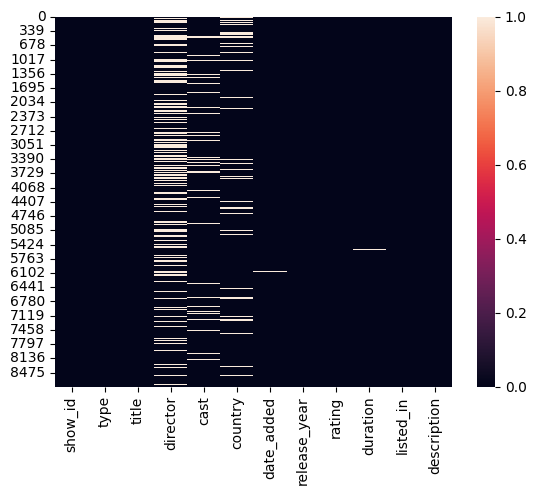

In [ ]:
sns.heatmap(df.isnull()) # from this chart we can realize that 5 cols have Null values {'director' ,'cast' ,'country','date_added','duration'}

In [ ]:
df.info()  #shows  col name , no of NUll values , Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Total number of null values in the dataframe
df.isnull().sum().sum()

4307

In [ ]:
print("Col 'cast' contains     : (",df['cast'].isnull().sum() ,") Null value")
print("Col 'director' contains : (",df['director'].isnull().sum() ,") Null value")
print("Col 'director' contains : (",df['country'].isnull().sum() ,") Null value")

Col 'cast' contains     : ( 825 ) Null value
Col 'director' contains : ( 2634 ) Null value
Col 'director' contains : ( 831 ) Null value


they have many Null values so droping rows that have Null will affect the data

In [ ]:
#replacing Null Values in these cols by "Unkown" val

df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].replace(np.nan, "Unknown ")
df

In [ ]:
#drop rows that contain "rating" or "duration" or "date_added" Null Value
df.dropna(subset=['rating','duration','date_added'],inplace =True)
df

In [ ]:
df.isnull().sum() #Done✅✅

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now Data does not contain any Null Values

COL "date_added"

In [ ]:
df[ 'date_added'].dtype

dtype('O')

In [ ]:
#convert its Data Type from "object" to "Date"
df[ 'date_added']= df['date_added'].apply(pd.to_datetime)
df[ 'date_added'].dtype

dtype('<M8[ns]')

In [ ]:
#splilting Year from date_added col
df['loading_Year'] = df ['date_added'].dt.year
df['loading_Year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: loading_Year, Length: 8790, dtype: int64

In [ ]:
#splilting month from date_added col and covert val to Month name
df['loading_Month']= df ['date_added'].dt.month_name()
df['loading_Month']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: loading_Month, Length: 8790, dtype: object

In [ ]:
#Now we can drop "date_added" col
df.drop("date_added",axis=1,inplace=True)

In [ ]:
#Checking statistics of columns for the int data type
df.describe(include=['int'])

,release_year,loading_Year
count,8790.000000,8790.000000
mean,2014.183163,2018.873606
std,8.825466,1.573568
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


Split duration column

In [ ]:
df['duration'].unique()

In [ ]:
df[['Minutes','Units']]=df['duration'].str.split(' ',expand=True)

In [ ]:
#convert type
df['Minutes'].astype(int)

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: Minutes, Length: 8790, dtype: int64

Cleaning Done✅✅

# Exploratoration with some Visualizations📊📈📉

In [ ]:
df_temp=df[['loading_Year','release_year']]
df_temp

,loading_Year,release_year
0,2021,2020
1,2021,2021
2,2021,2021
3,2021,2021
4,2021,2021
...,...,...
8802,2019,2007
8803,2019,2018
8804,2019,2009
8805,2020,2006


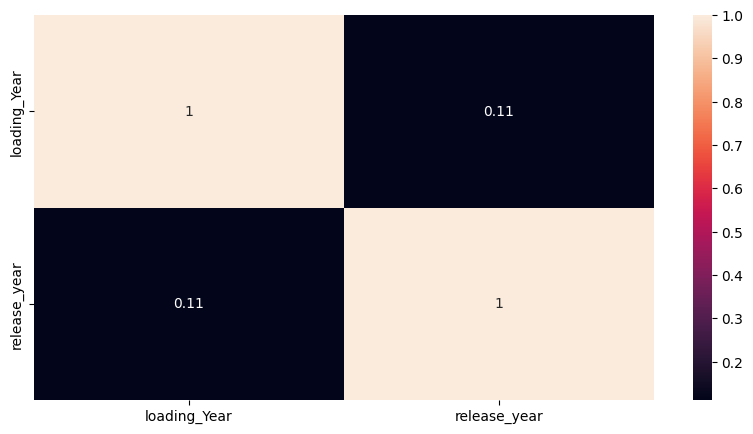

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_temp.corr(), annot=True) # visualizing relationships or patterns in a dataset using correlation matrix
plt.show()

No. of Movies & TV shows that loaded for each Year

In [ ]:
df['loading_Year'].value_counts().reset_index(name='count')

,index,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


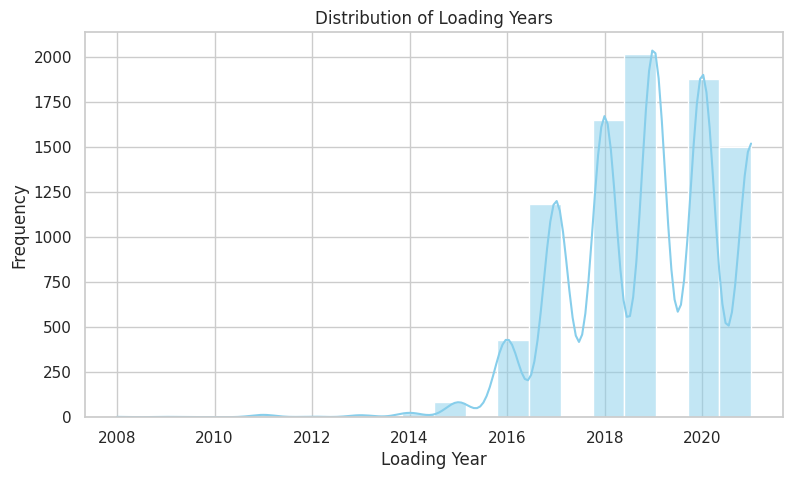

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x='loading_Year', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Loading Years')
plt.xlabel('Loading Year')
plt.ylabel('Frequency')
plt.show()

<ipython-input-41-bd8fa40b529e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_temp, palette='viridis')


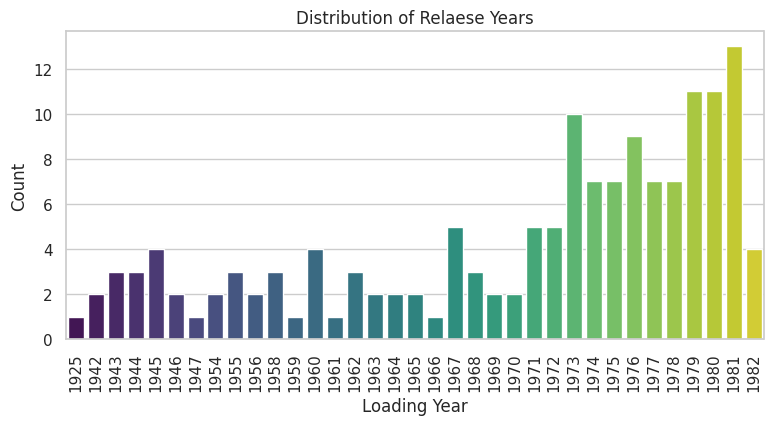

In [ ]:
df_temp=df['release_year'].sort_values().head(150)
sns.set(style="whitegrid")
plt.figure(figsize=(9, 4))
sns.countplot(x=df_temp, palette='viridis')
plt.xlabel('Loading Year')
plt.ylabel('Count')
plt.title('Distribution of Relaese Years')
plt.xticks(rotation=90)  # Rotate x-axis labels f

plt.show()

How many Movies & TV Shows are in the dataset?

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
type_counts=df.groupby('type')['type'].count().reset_index(name='count')

type_counts

,type,count
0,Movie,6126
1,TV Show,2664


<ipython-input-46-617760d671a7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=type_counts['type'],y= type_counts['count'],  palette='Set2', ci=None)
<ipython-input-46-617760d671a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts['type'],y= type_counts['count'],  palette='Set2', ci=None)


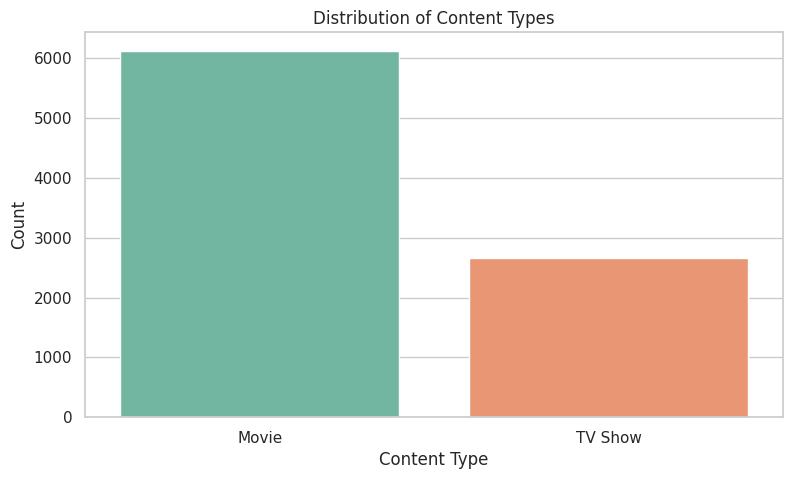

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.barplot(x=type_counts['type'],y= type_counts['count'],  palette='Set2', ci=None)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types')
plt.show()

How many and what movies that released in 2000

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'loading_Year', 'loading_Month', 'Minutes', 'Units'],
      dtype='object')

In [ ]:
df[(df['type']=='Movie' )& (df['release_year']==2000)]

In [ ]:
print("There are :",len(df[(df['type']=='Movie' )& (df['release_year']==2000)]),"Movie released in 2000")

There are : 33 Movie released in 2000


Show only titles of all TV Shows that released in India

In [ ]:
df[(df['type']=='TV Show')&(df['country']=='India') ]['title']

In [ ]:
df['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [ ]:
print("There are :",len(df[(df['type']=='TV Show')&(df['country']=='India') ]),"TV Shows that released in India ")

There are : 79 TV Shows that released in India 


Show top 10 directors , who gave the heighest num of Movies and TV Shows to Netflix

In [ ]:
df['director'].value_counts().iloc[1:11]
#we start from index 1 as 0 is unknown "Nan"

In [ ]:
print("first top 10 are:")
i=0
for name in df['director'].value_counts().iloc[1:11].index:
    i+=1
    print(i,">>",name)

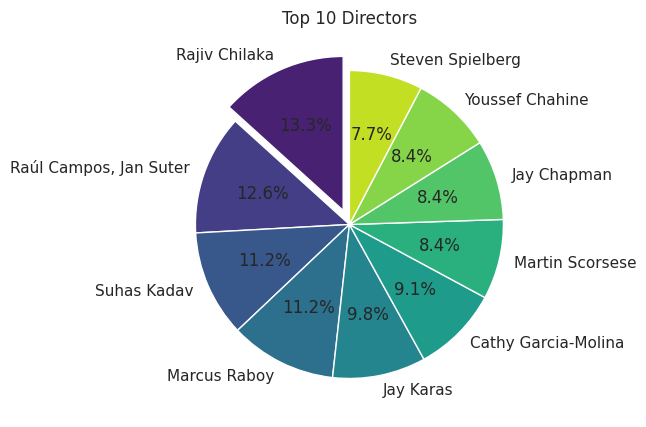

In [ ]:
data = df['director'].value_counts().iloc[1:11].to_dict()
df2 = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(df2['Count'], labels=df2['Director'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', n_colors=10),explode=explode)
plt.title('Top 10 Directors')
plt.show()

Show all Movies that is directord by "Steven Spielberg" in United States

In [ ]:
df[ (df['type']=='Movie')&(df['director']=='Steven Spielberg') &(df['country']=="United States")]

In [ ]:
print("Steven Spielberg made ",len(df[ (df['type']=='Movie')&(df['director']=='Youssef Chahine') &(df['country']=="Egypt")]),"Movies in United States")

Steven Spielberg made  7 Movies in United States


In how many Movies and TV shows , duration was 100 minute

In [ ]:
df[df['duration']=='100 min']

In [ ]:
print(len(df[df['duration']=='100 min']) ,"Movies and TV shows have a duration  100 minute")

108 Movies and TV shows have a duration  100 minute


Show different Ratings defined by Netflix

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'loading_Year', 'loading_Month', 'Minutes', 'Units'],
      dtype='object')

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

How many Movies got "TV-14" in "India"

In [ ]:
df[(df['type']=="Movie")&(df['rating']=='TV-14')&(df['country']=='India')]

In [ ]:
print(len(df[(df['type']=="Movie")&(df['rating']=='TV-14')&(df['country']=='India')])," Movies got 'TV-14' in India")

526  Movies got 'TV-14' in India


How many TV Show got the "R" rating after year 2010

In [ ]:
df[(df['type']=="TV Show")&(df['rating']=='R')&(df['release_year']>2010)]

In [ ]:
print(len(df[(df['type']=="TV Show")&(df['rating']=='R')&(df['release_year']>2010)]),'TV Show got the "R" rating after year 2010')

2 TV Show got the "R" rating after year 2010


Which Country has the heighest no of TV Shows

In [ ]:
df[df['type']=='TV Show']['country'].value_counts()

United States                                    754
Unknown                                          390
United Kingdom                                   212
Japan                                            167
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [ ]:
print("(",df[df['type']=='TV Show']['country'].value_counts().index[0],") is the country that has the heighest no of TV Shows ")

( United States ) is the country that has the heighest no of TV Shows 


<ipython-input-71-cfa69fd8a53b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette='viridis')


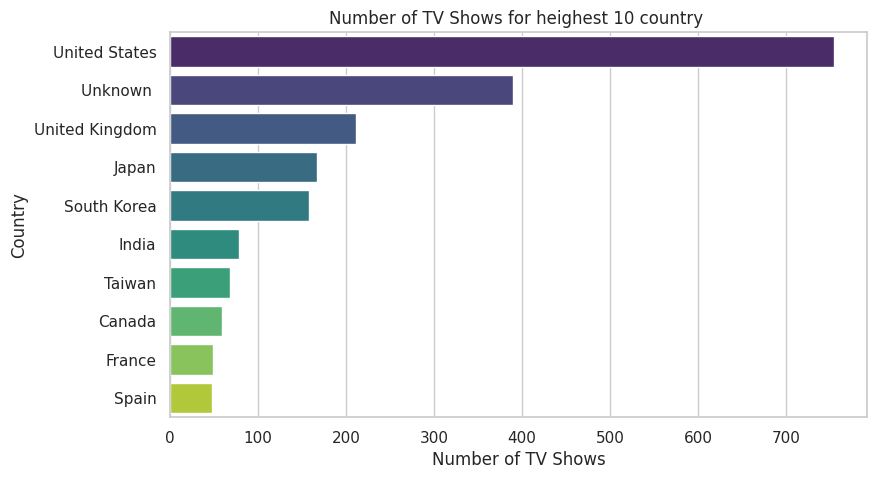

In [ ]:
data = df[df['type']=='TV Show']['country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(9, 5))
sns.barplot(x=data.values, y=data.index, palette='viridis')
plt.title('Number of TV Shows for heighest 10 country ')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()

Show all Dramas Moives

In [ ]:
df[(df['type']=='Movie')&(df['listed_in']=='Dramas')]

In [ ]:
print("There are (",len(df[(df['type']=='Movie')&(df['listed_in']=='Dramas')]),") Dramas Moives")

There are ( 137 ) Dramas Moives


In [ ]:
df_filter = df[(df["release_year"] < 2020) & (df["release_year"] > 1900)]
df_filter =df_filter .head(2000)

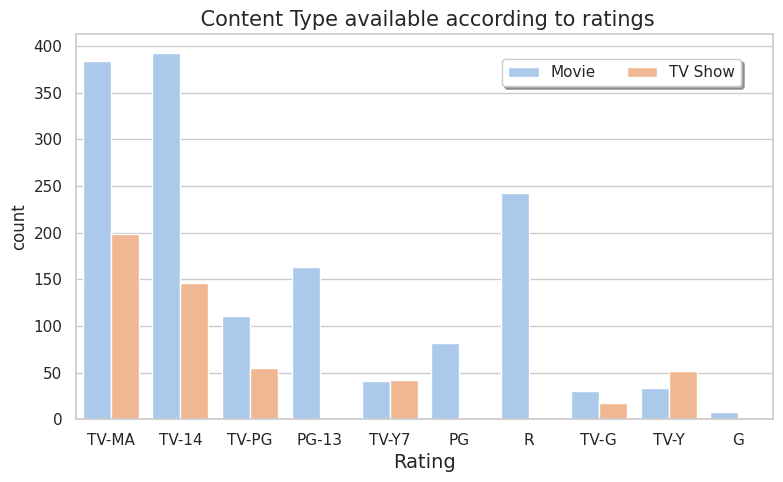

In [ ]:
plt.figure(figsize=(9, 5))
ax=sns.countplot(data=df_filter, x='rating', hue='type', palette='pastel')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.600,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [ ]:
# selecting the relevant features for recommendation

selected_features = ['type','director','cast','country','listed_in','title','description']
print(selected_features)

['type', 'director', 'cast', 'country', 'listed_in', 'title', 'description']


In [ ]:
# replacing the null valuess with null string

for feature in selected_features:
  df[feature] = df[feature].fillna('')

In [ ]:
# combining all the 5 selected features

combined_features = df['type']+' '+df['director']+' '+df['cast']+' '+df['country']+' '+df['listed_in']+' '+df['title']+' '+df['description']

In [ ]:
print(combined_features)

0       Movie Kirsten Johnson  United States Documenta...
1       TV Show  Ama Qamata, Khosi Ngema, Gail Mabalan...
2       TV Show Julien Leclercq Sami Bouajila, Tracy G...
3       TV Show    Docuseries, Reality TV Jailbirds Ne...
4       TV Show  Mayur More, Jitendra Kumar, Ranjan Ra...
                              ...                        
8802    Movie David Fincher Mark Ruffalo, Jake Gyllenh...
8803    TV Show    Kids' TV, Korean TV Shows, TV Comed...
8804    Movie Ruben Fleischer Jesse Eisenberg, Woody H...
8805    Movie Peter Hewitt Tim Allen, Courteney Cox, C...
8806    Movie Mozez Singh Vicky Kaushal, Sarah-Jane Di...
Length: 8807, dtype: object


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 22119)	0.2550172192994244
  (0, 15559)	0.1505526370215387
  (0, 6590)	0.15754977009534196
  (0, 47404)	0.12319467393445593
  (0, 20377)	0.12440265078745391
  (0, 47858)	0.04442032273003897
  (0, 50955)	0.1714447015388485
  (0, 9967)	0.23534350370609317
  (0, 2302)	0.043831148060915
  (0, 22461)	0.23534350370609317
  (0, 21973)	0.05142654117991365
  (0, 11683)	0.1347030598064078
  (0, 44900)	0.21129450286527635
  (0, 16278)	0.1735098428004065
  (0, 27354)	0.09328390464294582
  (0, 20817)	0.127939150681864
  (0, 33994)	0.04749533162449614
  (0, 14664)	0.1632793718174691
  (0, 47375)	0.07769518453717017
  (0, 32815)	0.23096821845860757
  (0, 15884)	0.12247607423774055
  (0, 20475)	0.078176393213737
  (0, 3253)	0.08582497991479782
  (0, 11656)	0.1632793718174691
  (0, 22584)	0.08768931871549285
  :	:
  (8806, 24676)	0.14718629831371433
  (8806, 527)	0.09507208803863636
  (8806, 6704)	0.10847582080962302
  (8806, 51216)	0.09427838757412148
  (8806, 8866)	0.16117578124138282
  (8806, 3

#Cosine Similarity

In [ ]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.00000000e+00 8.75674031e-03 1.75468881e-02 ... 1.36314944e-02
  1.71332351e-02 2.66324519e-02]
 [8.75674031e-03 1.00000000e+00 3.17751302e-02 ... 9.62579221e-04
  0.00000000e+00 2.56216556e-03]
 [1.75468881e-02 3.17751302e-02 1.00000000e+00 ... 5.09241343e-03
  9.65154839e-03 2.88732742e-02]
 ...
 [1.36314944e-02 9.62579221e-04 5.09241343e-03 ... 1.00000000e+00
  5.76978140e-02 5.57203224e-03]
 [1.71332351e-02 0.00000000e+00 9.65154839e-03 ... 5.76978140e-02
  1.00000000e+00 9.68104807e-03]
 [2.66324519e-02 2.56216556e-03 2.88732742e-02 ... 5.57203224e-03
  9.68104807e-03 1.00000000e+00]]


In [ ]:
print(similarity.shape)

(8807, 8807)


Getting the movie name from the user

In [ ]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : iron man


In [ ]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = df['title'].tolist()
print(list_of_all_titles)

['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory', 'Midnight Mass', 'My Little Pony: A New Generation', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Vendetta: Truth, Lies and The Mafia', 'Bangkok Breaking', 'Je Suis Karl', 'Confessions of an Invisible Girl', 'Crime Stories: India Detectives', 'Dear White People', "Europe's Most Dangerous Man: Otto Skorzeny in Spain", 'Falsa identidad', 'Intrusion', 'Jaguar', 'Monsters Inside: The 24 Faces of Billy Milligan', 'Resurrection: Ertugrul', 'Avvai Shanmughi', 'Go! Go! Cory Carson: Chrissy Takes the Wheel', 'Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Ankahi Kahaniya', 'Chicago Party Aunt', 'Sex Education', 'Squid Game', 'Tayo and Little Wizards', 'The Father Who Moves Mountains', 'The Stronghold', 'Angry Birds', 'Birth of the Dragon', 'Chhota Bheem', 'He-Man and the Masters of the Universe', 'Jaws', 'Jaws 2', 'Jaws 3', 'Jaws: The Revenge

In [ ]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['The Lion Woman', 'Rain Man', 'Bromance']


In [ ]:
close_match = find_close_match[0]
print(close_match)

The Lion Woman


In [ ]:
# Add a new column named 'Index' with a sequence of numbers
df['index'] = range(1, len(df) + 1)
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water                    
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans                    
4         s5  TV Show           Kota Factory                    
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb                    
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
# finding the index of the movie with title

index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

5249


In [ ]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.0071199615424291495), (1, 0.004912483111300087), (2, 0.0029961111744787627), (3, 0.0), (4, 0.0036798932067002668), (5, 0.0034174974944359174), (6, 0.008402610576751058), (7, 0.03106377663602396), (8, 0.0), (9, 0.006475646300087747), (10, 0.01149545075783693), (11, 0.0017853752384838634), (12, 0.01329463109898749), (13, 0.007413032072795933), (14, 0.0), (15, 0.00487572722674171), (16, 0.022694897138746097), (17, 0.060192878863063515), (18, 0.001993726816528037), (19, 0.0035965832840859583), (20, 0.007847429328371177), (21, 0.00645702174616692), (22, 0.015169924097166805), (23, 0.011953619948198399), (24, 0.02845517964280197), (25, 0.0077005052306528855), (26, 0.015490624964893743), (27, 0.0022727549268526524), (28, 0.008156740254445554), (29, 0.0021170467215191084), (30, 0.03388440405098314), (31, 0.0), (32, 0.003708072825041423), (33, 0.006921536199996068), (34, 0.0), (35, 0.013583495829868569), (36, 0.01408816842674478), (37, 0.0), (38, 0.006377463952798765), (39, 0.0), (40, 0.

In [ ]:
len(similarity_score)

8807

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(5249, 1.0000000000000002), (3253, 0.25977603002574046), (3279, 0.22054407999500722), (2498, 0.20042566096393138), (6408, 0.18707389627051574), (1857, 0.1772193290165813), (4187, 0.16528036280731842), (5052, 0.15436117674693434), (6706, 0.15212208247851705), (7084, 0.14922962471176587), (5379, 0.14656803414845426), (7143, 0.14422309564212532), (2335, 0.14220142546585116), (2425, 0.14220142546585116), (5086, 0.14156936955327976), (5875, 0.14156936955327976), (4962, 0.14002168097662926), (5839, 0.14002168097662926), (3625, 0.138398620140537), (8268, 0.13787409621390162), (6563, 0.1290491584013499), (5678, 0.12705642810691506), (2334, 0.12370388245046425), (4738, 0.12349908712141572), (2782, 0.12093570359087355), (3118, 0.11712354770299584), (8699, 0.1152595002597918), (2669, 0.11516912774977957), (5706, 0.1125264206611985), (4866, 0.11226887184811045), (4799, 0.11197617149317882), (869, 0.11002123085385832), (6286, 0.10880633029126997), (3349, 0.10784256326649984), (1840, 0.106451799834

In [ ]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<15):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Jaws 2
2 . Jaws
3 . Jaws: The Revenge
4 . Jaws 3
5 . The Women and the Murderer
6 . Ryan Hamilton: Happy Face
7 . Tremors 3: Back to Perfection
8 . Bethany Hamilton: Unstoppable
9 . Thorne: Sleepyhead
10 . Soul Surfer
11 . In The Deep
12 . Awake
13 . Madam Chief Minister
14 . Shark Night


In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = df['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df[df.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<15):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Jaws
Movies suggested for you : 

1 . Jaws 2
2 . Jaws
3 . Jaws: The Revenge
4 . Jaws 3
5 . The Women and the Murderer
6 . Ryan Hamilton: Happy Face
7 . Tremors 3: Back to Perfection
8 . Bethany Hamilton: Unstoppable
9 . Thorne: Sleepyhead
10 . Soul Surfer
11 . In The Deep
12 . Awake
13 . Madam Chief Minister
14 . Shark Night
